In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Global variables
separator = "_"*20
divider = "\n" + "*"*90 + "\n"

# Seed for reproducibility 
np.random.seed(24) 
# Generate dataset 
x, y = make_classification( 
n_samples=100, 
n_features=2, 
n_redundant=0, 
n_clusters_per_class=1, 
class_sep=2.0, 
random_state=24 
) 
# Create DataFrame with desired column names 
df_new = pd.DataFrame(x, columns=["Feature_1", "Feature_2"]) 
df_new["Target"] = y 
# Display first few rows 
print(df_new.head())

   Feature_1  Feature_2  Target
0   2.024766   2.629526       0
1  -1.888766   2.069271       1
2  -1.304999   2.364436       1
3   0.340586   2.395638       0
4  -2.145035   1.879788       1


In [2]:
print(f"{separator} Missing Data: {separator}\n{df_new.isnull().sum()}")

____________________ Missing Data: ____________________
Feature_1    0
Feature_2    0
Target       0
dtype: int64


In [3]:
# Select Feature and Target
x = df_new[["Feature_1", "Feature_2"]]
y = df_new["Target"]

In [4]:
# Split the dataset into training and test data using train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print(f"{separator} X Train Data: {separator}\n{x_train}")

____________________ X Train Data: ____________________
    Feature_1  Feature_2
11  -0.112513   2.618765
47   0.494523   0.434966
85  -2.601796   1.833042
28  -1.845286   2.039426
93   3.356133   0.755395
..        ...        ...
60   2.923214   2.797563
71   2.070631   3.283350
14   2.135587   0.943496
92  -2.370964   1.845709
51   0.012863   2.671404

[70 rows x 2 columns]


In [5]:
# Instantiate the SVM model with chosen kernel (e.g, liner RBF) and train it on the scaled training data
svm_model = SVC(kernel="linear", random_state=42)
svm_model.fit(x_train, y_train) 

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [6]:
# Make predictions and Evaluate the Model
y_pred = svm_model.predict(x_test)
print("\n=> Accuracy:", accuracy_score(y_test, y_pred))
print(f"{divider}\n=> Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f"{divider}\n=> Classification Report:\n", classification_report(y_test, y_pred))


=> Accuracy: 0.9666666666666667

******************************************************************************************

=> Confusion Matrix:
 [[12  0]
 [ 1 17]]

******************************************************************************************

=> Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.94      0.97        18

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



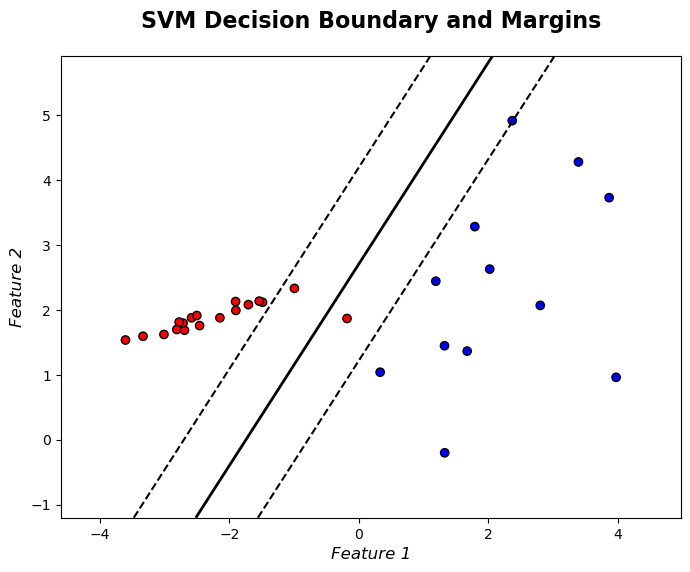

In [7]:
plt.figure(figsize=(8, 6))

x_test = x_test.values

# Scatter plot of test points colored by class
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap="bwr", edgecolors='k')

# Define grid boundaries based on test data
x_min, x_max = x_test[:, 0].min() - 1, x_test[:, 0].max() + 1
y_min, y_max = x_test[:, 1].min() - 1, x_test[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Compute decision function on the grid
# Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
grid = np.c_[xx.ravel(), yy.ravel()]
grid_df = pd.DataFrame(grid, columns=x_train.columns)

Z = svm_model.decision_function(grid_df).reshape(xx.shape)

# Plot decision boundary and margins
plt.contour(xx, yy, Z, levels=[0], colors='k', linewidths=2)         # Hyperplane
plt.contour(xx, yy, Z, levels=[-1, 1], colors='k', linestyles="--")  # Margins

plt.title("SVM Decision Boundary and Margins", fontsize=16, fontweight="bold", pad=20)
plt.xlabel("Feature 1", fontsize=12, fontstyle="italic")
plt.ylabel("Feature 2", fontsize=12, fontstyle="italic")
plt.show()